# **Proses Label dengan Indonesia Sentiment Lexicon**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
# Path lengkap ke file di Google Drive
pos_path = '/content/drive/MyDrive/TugasAkhir/positiff.tsv'
neg_path = '/content/drive/MyDrive/TugasAkhir/negatiff.tsv'

# Baca dan ubah ke set
pos_lexicon = set(pd.read_csv(pos_path, sep="\t", header=None)[0].tolist())
neg_lexicon = set(pd.read_csv(neg_path, sep="\t", header=None)[0].tolist())

# Cek jumlah kata dalam lexicon
print(f"Jumlah kata positif: {len(pos_lexicon)}")
print(f"Jumlah kata negatif: {len(neg_lexicon)}")

Jumlah kata positif: 3610
Jumlah kata negatif: 6608


In [ ]:
# Load dataset (Ganti dengan nama file dataset yang sudah diupload)
file_path = '/content/drive/MyDrive/Tugas_Akhir/dataclear.csv'
df = pd.read_csv(file_path)

# Tampilkan beberapa baris pertama dari dataset
df

,preprocessed_text
0,profil dito ariotedjo menteri pemuda olahraga ...
1,hari kerja ahy atas deret menteri citra menter...
2,saksi menit sama kabinet merah putih utakatik ...
3,presiden prabowo instruksi jajar kabinet merah...
4,presiden ri prabowo subianto minta jajar kabin...
...,...
10224,menteri uang sri mulyani turut panggil preside...
10225,presiden pilih prabowo subianto panggil deret ...
10226,calon menteri undang diam prabowo hambalang ka...
10227,mantan istri basuki tjahaja purnama ahok veron...


In [ ]:
def analyze_sentiment(text):
    words = str(text).lower().split()  # Pastikan text dalam format string
    pos_count = sum(1 for word in words if word in pos_lexicon)
    neg_count = sum(1 for word in words if word in neg_lexicon)

    # Menentukan label sentimen
    if pos_count > neg_count:
        return "positive" #Bisa ubah ke kata positif
    elif neg_count > pos_count:
        return "negative" #Bisa ubah ke kata negative
    else:
        return "neutral" #Bisa ubah ke kata netral

In [ ]:
# Terapkan fungsi untuk labeling sentimen pada kolom yang relevan
df["label"] = df["preprocessed_text"].apply(analyze_sentiment)

# Lihat beberapa hasil pertama
print(df.head(20))

                                    preprocessed_text     label
0   profil dito ariotedjo menteri pemuda olahraga ...  negative
1   hari kerja ahy atas deret menteri citra menter...   neutral
2   saksi menit sama kabinet merah putih utakatik ...  negative
3   presiden prabowo instruksi jajar kabinet merah...  negative
4   presiden ri prabowo subianto minta jajar kabin...   neutral
5   profil agus gumiwang kartasasmita menteri indu...  negative
6   kpk apresiasi patuh lhkpn kabinet merah putih ...  positive
7   presiden ri prabowo subianto beri arah kabinet...  negative
8   menteri kabinet merah putih kerja buruk hari k...  negative
9   utakatik strategi biaya haji menit sama kabine...  positive
10  mulia mr mohon segera ganti wakil wakil rakyat...  negative
11  prabowo lalu instruksi menteri kepala lembaga ...  negative
12  hari kabinet merah putih mayoritas rakyat rasa...  negative
13  komisi berantas korupsi kpk rilis lapor harta ...  positive
14  daftar menteri kerja buruk hingga mu

In [ ]:
positive_count = len(df[df['label'] == 'positive'])
print("Total data points with positive label:", positive_count)

negative_count = len(df[df['label'] == 'negative'])
print("Total data points with negative label:", negative_count)

neutral_count = len(df[df['label'] == 'neutral'])
print("Total data points with neutral label:", neutral_count)

Total data points with positive label: 3694
Total data points with negative label: 5273
Total data points with neutral label: 1262


In [ ]:
# # Hapus kolom 'sentimen_' jika ada
# if 'sentimen_' in df.columns:
#     df = df.drop('sentimen_', axis=1)

In [ ]:
# Simpan ke file CSV baru
output_path = "/content/drive/MyDrive/File_TA_Fiks/Label_lexicon.csv"
df.to_csv(output_path, index=False)

print(f"Labeling selesai! Hasil disimpan di {output_path}")

Labeling selesai! Hasil disimpan di /content/drive/MyDrive/File_TA_Fiks/Label_lexicon.csv


In [ ]:
# Cek isi folder untuk memastikan file tersimpan
!ls "/content/drive/MyDrive/File_TA_Fiks/"

Label_lexicon.csv  positiff.tsv		 X_tfidf.npz
negatiff.tsv	   tfidf_vectorizer.pkl  y_tfidf.npy


In [ ]:
# from google.colab import files
# files.download("/content/Datalabel.csv")

# **Visualisasi**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Membaca dataset
file_path = '/content/drive/MyDrive/File_TA_Fiks/Label_lexicon.csv'
df = pd.read_csv(file_path)

# Menampilkan 5 baris pertama dataset untuk memastikan kolom 'Sentimen' ada
print(df.head(20))

                                    preprocessed_text     label
0   profil dito ariotedjo menteri pemuda olahraga ...  negative
1   hari kerja ahy atas deret menteri citra menter...   neutral
2   saksi menit sama kabinet merah putih utakatik ...  negative
3   presiden prabowo instruksi jajar kabinet merah...  negative
4   presiden ri prabowo subianto minta jajar kabin...   neutral
5   profil agus gumiwang kartasasmita menteri indu...  negative
6   kpk apresiasi patuh lhkpn kabinet merah putih ...  positive
7   presiden ri prabowo subianto beri arah kabinet...  negative
8   menteri kabinet merah putih kerja buruk hari k...  negative
9   utakatik strategi biaya haji menit sama kabine...  positive
10  mulia mr mohon segera ganti wakil wakil rakyat...  negative
11  prabowo lalu instruksi menteri kepala lembaga ...  negative
12  hari kabinet merah putih mayoritas rakyat rasa...  negative
13  komisi berantas korupsi kpk rilis lapor harta ...  positive
14  daftar menteri kerja buruk hingga mu

In [ ]:
# Menampilkan nama kolom untuk memastikan 'sentimen' ada
print("Kolom dalam dataset:", df.columns)

Kolom dalam dataset: Index(['preprocessed_text', 'label'], dtype='object')


In [ ]:
# Menghitung jumlah masing-masing sentimen
sentiment_counts = df['label'].value_counts()

# Menampilkan hasil perhitungan
print(sentiment_counts)

label
negative    5273
positive    3694
neutral     1262
Name: count, dtype: int64


In [ ]:
# Menentukan warna sesuai kategori sentimen
color_mapping = {'negative': 'pink', 'neutral': 'cyan', 'positive': 'gray'}
colors = [color_mapping[label] for label in sentiment_counts.index if label in color_mapping]

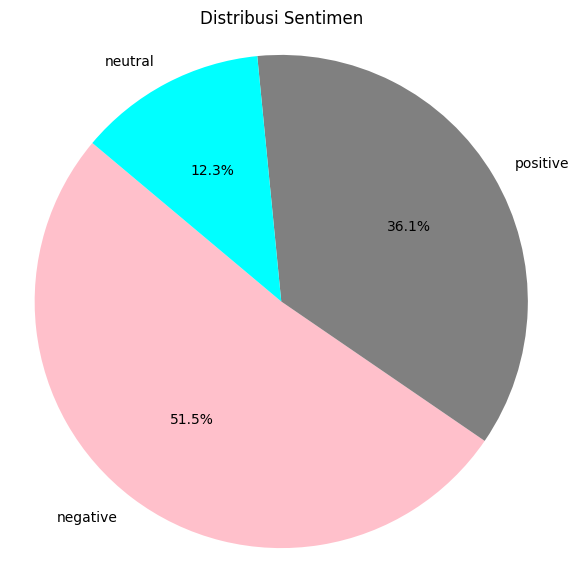

In [ ]:
# Membuat Pie Chart
plt.figure(figsize=(7, 7))

plt.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%',
        colors=colors, shadow=False, startangle=140)

plt.title('Distribusi Sentimen')
plt.axis('equal')  # Agar pie chart berbentuk lingkaran
plt.show()

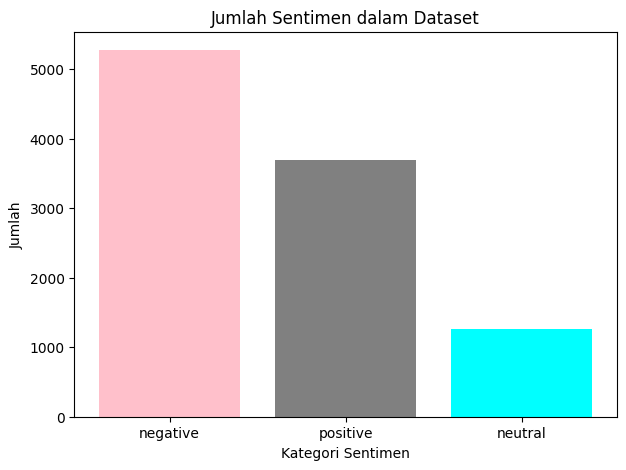

In [ ]:
# Membuat Bar Plot
plt.figure(figsize=(7, 5))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=[color_mapping[label] for label in sentiment_counts.index])
plt.xlabel('Kategori Sentimen')
plt.ylabel('Jumlah')
plt.title('Jumlah Sentimen dalam Dataset')
plt.show()